# Imports

In [1]:
import gymnasium as gym
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy

import time

2023-10-27 13:56:22.105913: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-27 13:56:22.156665: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-27 13:56:22.831914: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Environment

In [2]:
env = gym.make("Taxi-v3", render_mode="rgb_array")

# Model

In [3]:
# Instantiate the agent
model = DQN("MlpPolicy", 
            env, 
            verbose=0, 
            tensorboard_log="dqn_training1",
            learning_rate = 0.001,
            buffer_size = 100000,
            learning_starts = 5000,
            batch_size= 32,
            tau= 0.8,
            gamma= 0.9,
            device = "cuda",
            max_grad_norm = 10,
            exploration_initial_eps = 1,
            exploration_final_eps = 0.1,
            exploration_fraction = 0.3,
            replay_buffer_class  = None,
            )

# Training

In [ ]:

model.learn(total_timesteps=2000000, progress_bar=True,tb_log_name="taxi_v1")

# Save Model

In [5]:
# Save the agent
model.save("taxi_v3")
del model  

# Load Model

In [3]:
model = DQN.load("taxi_v3", env=env)

In [4]:
# Enjoy trained agent
vec_env = model.get_env()
obs = vec_env.reset()
cum_reward = 0 
ep_reward = []
i = 0
while (True):
    action, _states = model.predict(obs, deterministic=True)
    #print(action)
    obs, rewards, done, info = vec_env.step(action)
    #vec_env.render("human")
    cum_reward += rewards
    if done:
      obs = vec_env.reset()
      i += 1
      ep_reward.append(cum_reward)
      cum_reward = 0
      if (i > 100):
        break

vec_env.close()
env.close()

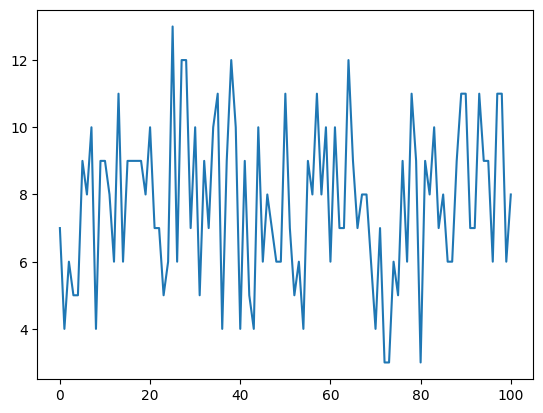

In [6]:
import matplotlib.pyplot as plt
plt.plot(ep_reward)